In [1]:
import numpy as np
import scipy

import matplotlib.pyplot as plt
import matplotlib as mpl

from ipywidgets import interact, interactive, fixed, interact_manual

## Numerical derivatives and Hamiltonian
h = 1E-7
dfdx = lambda f, x: (f(x + h) - f(x - h))/(2*h)
d2fdx2 = lambda f, x: (f(x + h) - 2*f(x) + f(x - h))/(h*h)

# Variation Theory Demonstration

In [13]:
# Wavefunctions
Ψ_g = lambda ρ: np.exp(-ρ/2)
Ψ_t = lambda ρ, α: np.exp(-α*ρ*ρ)

R = 10
ρ = np.linspace(0,R,100)

S_g = scipy.integrate.quad(lambda x:Ψ_g(x)*Ψ_g(x), 0, R)[0]

def render(α):
  S_t = scipy.integrate.quad(lambda x:Ψ_t(x, α)*Ψ_t(x, α), 0, R)[0]

  plt.figure(1)
  plt.plot(ρ, Ψ_g(ρ)/np.sqrt(S_g))
  plt.plot(ρ, Ψ_t(ρ, α)/np.sqrt(S_t))
  plt.legend(['Ground state', 'Ψ$_t$'])
  plt.show()

interactive(render, α=(0.1, 1))

interactive(children=(FloatSlider(value=0.55, description='α', max=1.0, min=0.1), Output()), _dom_classes=('wi…

# Rayleigh-Ritz Demonstration

We will approximate the ground state of a particle in a box using a test wavefunction that is the linear combination of two arbitrary functions. First, manually adjust the coefficient that the wavefunctions are multiplied by.

In [2]:
# Constants
# n = 1
# hbar = 1.05457160E-34 # J.s
# m = 9.10938E-31 kg, for an electron
# E_o = n**2*np.pi**2*hbar**2/(2*m*L**2)
L = 1 # m

E_o = np.pi**2/2

# Wavefunctions
Ψ_g = lambda x: np.sqrt(2/L)*np.sin(np.pi*x/L)
Ψ_1 = lambda x: x*(1-x)
Ψ_2 = lambda x: x**2*(1-x)**2

# Matrix elements
## Overlap integrals
S_11 = scipy.integrate.quad(lambda x:Ψ_1(x)*Ψ_1(x), 0, L)[0]
S_12 = scipy.integrate.quad(lambda x:Ψ_1(x)*Ψ_2(x), 0, L)[0]
S_22 = scipy.integrate.quad(lambda x:Ψ_2(x)*Ψ_2(x), 0, L)[0]

## Hamiltonian
H = lambda f, x: -d2fdx2(f, x)/2
H_11 = scipy.integrate.quad(lambda x:Ψ_1(x)*H(Ψ_1,x), 0, L, full_output=True)[0]
H_12 = scipy.integrate.quad(lambda x:Ψ_1(x)*H(Ψ_2,x), 0, L, full_output=True)[0]
H_22 = scipy.integrate.quad(lambda x:Ψ_2(x)*H(Ψ_2,x), 0, L, full_output=True)[0]

x = np.linspace(0,L,100)

def render(c_1):
  # Solve for c_2 that normalizes the wavefunction
  # S_22*c_2*c_2 + 2*c_1*S_12*c_2 + (c_1*c_1*S_11 - 1) = 0
  a = S_22
  b = 2*c_1*S_12
  c = (c_1*c_1*S_11 - 1)
  c_2 = (-b + np.sqrt(np.square(b) - 4*a*c))/(2*a)

  E = c_1*c_1*H_11 + 2*c_1*c_2*H_12 + c_2*c_2*H_22

  print(f'c_2: {c_2:.3f}')
  print(f'E: {E:.5f} hbar**2/m')
  print(f'E_o: {E_o:.5f} hbar**2/m')

  plt.figure(1)
  plt.plot(x, Ψ_g(x))
  plt.plot(x, c_1*Ψ_1(x),'--')
  plt.plot(x, c_2*Ψ_2(x),'--')
  plt.plot(x, (c_1*Ψ_1(x) + c_2*Ψ_2(x)))
  plt.legend(['Ground state', 'c$_1$*Ψ$_1$', 'c$_2$*Ψ$_2$', 'Ψ$_t$'])
  plt.show()

interactive(render, c_1=(0., np.sqrt(1/S_11)))

interactive(children=(FloatSlider(value=2.7386127875258306, description='c_1', max=5.477225575051661), Output(…

The code below finds and plots the optimal solution.

E_o: 4.93480 hbar**2/m
Optimal E: 4.93450 hbar**2/m
Optimal c_1: 4.40227; c_2: 4.99835


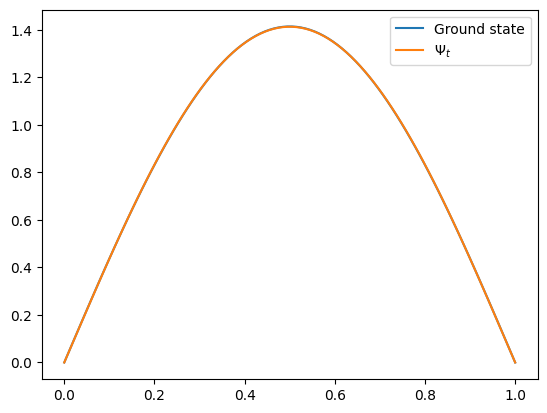

In [4]:
# det|H - ES|
# = (H_11 - E*S_11)(H_22 - E*S_22) - (H_12 - E*S_12)**2
#   H_11*H_22 - (H_22*S_11 + H_11*S_22)*E + S_12*S_22*E**2
# -(H_12**2   - 2*H_12*S_12*E             + S_12*S_12*E**2)
a = S_11*S_22 - S_12*S_12
b = -H_22*S_11 - H_11*S_22 + 2*H_12*S_12
c = H_11*H_22 - H_12*H_12
E = (-b - np.sqrt(np.square(b) - 4*a*c))/(2*a)
c2_over_c1 = -(H_11 - E*S_11)/(H_12 - E*S_12)
c_1 = 1/np.sqrt((S_22*c2_over_c1*c2_over_c1 + 2*S_12*c2_over_c1 + S_11))
c_2 = c2_over_c1*c_1

print(f'E_o: {E_o:.5f} hbar**2/m')
print(f'Optimal E: {E:0.5f} hbar**2/m')
print(f'Optimal c_1: {c_1:0.5f}; c_2: {c_2:0.5f}')

plt.plot(x, Ψ_g(x))
plt.plot(x, (c_1*Ψ_1(x) + c_2*Ψ_2(x)))
plt.legend(['Ground state', 'Ψ$_t$']);